# **Predicting Loan Defaults using ML model.**






# 1. Data Collection: Selection and get data




In [ ]:
## Instaling the packages. 
# To install the category_encoders package. 
!pip install category_encoders
#!pip install scikit-learn
#!pip install --upgrade scikit-learn==0.20.3
#!pip install --upgrade scikit-learn
#!pip install plot_confusion_matrix
#!pip install --upgrade category_encoders

In [ ]:
# Importing the libraries and dependencies required:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC
from six import StringIO
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

from sklearn import metrics
from six import StringIO
from sklearn.linear_model import Perceptron
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from category_encoders import *

from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

Get the Data
Use pandas to read lending_club_loan.csv as a dataframe called loans

In [ ]:
#Loading and displaying the dataset:
df = pd.read_csv('/content/lending_club_loan_dataset2.csv')

## Feature description:
* **id:** Unique ID of the loan application.
* **grade:** LC assigned loan grade.
* **annual_inc:** The self-reported annual income provided by the borrower during registration.
* **short_emp:** 1 when employed for 1 year or less.
* **emp_length_num:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership: Type of home ownership.
* **dti (Debt-To-Income Ratio):** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* **purpose:** A category provided by the borrower for the loan request.
* **term:** The number of payments on the loan. Values are in months and can be either 36 or 60.
* **last_delinq_none:** 1 when the borrower had at least one event of delinquency.
* **last_major_derog_none:** 1 borrower had at least 90 days of a bad rating.
* **revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* **total_rec_late_fee:** Late fees received to date.
* **od_ratio:** Overdraft ratio.
* **bad_loan:** 1 when a loan was not paid.

# 2. Data preparation

#  - Exploratory data analysis(EDA)

In [ ]:
df.info

<bound method DataFrame.info of              id grade  annual_inc  ...  total_rec_late_fee  od_ratio bad_loan
0      11454641     A    100000.0  ...                 0.0  0.160624        0
1       9604874     A     83000.0  ...                 0.0  0.810777        0
2       9684700     D     78000.0  ...                 0.0  0.035147        1
3       9695736     D     37536.0  ...                 0.0  0.534887        1
4       9795013     D     65000.0  ...                 0.0  0.166500        0
...         ...   ...         ...  ...                 ...       ...      ...
19995   6595657     B     27000.0  ...                 0.0  0.821782        1
19996   1576331     B     45000.0  ...                 0.0  0.652200        0
19997   6645736     B    104000.0  ...                 0.0  0.482555        0
19998   6625736     A     38400.0  ...                 0.0  0.822980        0
19999   6625685     B    150000.0  ...                 0.0  0.201388        0

[20000 rows x 15 columns]>

 The dataset has 20000 rows and 15 columns .

In [ ]:
df.head(3)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1


In [ ]:
# Type of variables:
df.dtypes.sort_values(ascending=True)

id                         int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
annual_inc               float64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [ ]:
# Couting variables by type:
df.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

The dataset has 20000 observations and 15 variables including the target (bad loan), divided into 11 numeric and 4 categoric features.

In [ ]:
#Main stats of numeric attributes:
df.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


From the difference between the mean and the median, and also the distance of maximum values of the variables ‘annual_inc’, ‘revol_util’ and ‘total_rec_late_fee’, it seems there are some outliers.


In [ ]:
# Main stats of categoric attributes:

df.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [ ]:
df.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [ ]:
data = pd.DataFrame(df)

In [ ]:
# Checking for missing values:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent %"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent %
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


There are variables with missing values: (home_ownership) with 7.08%, (dti) with 0.73%, and (last_major_derog_none) with 92.19%.

In [ ]:
# Checking data balance/proportion

loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,16000,80.0
1,4000,20.0


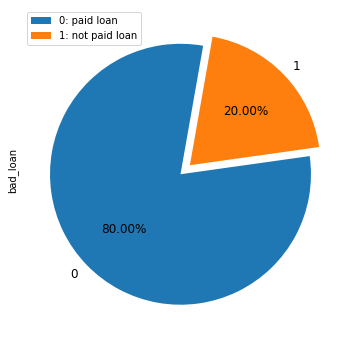

In [ ]:
# pie chart
data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);


20% not-paid loan --> default results (value 1)


80% paid loan --> (value 0)



## EDA functions



Describing the important features in the dataset using suitable graphics.

In [ ]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="r", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="b", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [ ]:
#Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()


In [ ]:
# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("bright"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [ ]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
